<h1><u> Computing Challenge Summer 2021</u></h1><br>

Group project by Nikita Dmitrieff, Clara Andiazabal, Neha Krishna, Parisa Amandine Kara, Kenan Gnonhoue Dokonon

<h3> Context </h3>
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. As a team we have provided an understanding to this problem by analysing the data provided by the WHO. In particular, the WHO wanted us to understand the key variables that most correlate to the occurrence of strokes, so that the correct policies can be implemented. We have also provided an understanding to which variables are instead not that important, so that the limited available money can be allocated accordingly.<br>


<u><h2>Table of Contents:</h2></u>
<h3><strong>Please use the following internal links to access the different stages of this notebook (The code takes around 6 mins to run):</strong></h3>
<h3><a href = "#Stage 1">1.Data Preprocessing</a></h3>
 <br><h4> 1.1 Importing and Loading the Dataset </h4>
 <br><h4> 1.2 Data Exploration</h4>
 <br><h4> 1.3 Preprocessing of Numerical Data</h4>
 <br><h4> 1.4 Preprocessing of Categorical Data</h4>
 
<h3><a href = "#Stage 2">2.Identifying of the Best Classifier</a></h3>
<br><h4>2.1 Parent Class of the Best of Each Classifier Function</h4>
<br><h4> 2.2 Funtion to Find the Best kNN Classifier </h4>
<br><h4> 2.3 Funtion to Find the Best Logistic Regression Classifier </h4>
<br><h4> 2.4 Funtion to Find the Random Forest Classifier </h4>
<br><h4> 2.5 Funtion to Find the Best of the SVM Classifiers </h4>
    
<h3><a href = "#Stage 3">3.Model Training Using Different Approaches to Train-Test Splitting </a></h3>
<br><h4>3.1 The Naive Approach using a 80-20 Train-Test Split</h4>
<br><h4>3.2 The Cost Sensitive Approach</h4>
<br><h4>3.3 The Undersampling Approach</h4>
<br><h4>3.4. Tuning of the Best Classifier Using the Cost-Sensitive Appproach</h4>

<h3><a href = "#Stage 4">4. Graphical User Interface</a></h3> <br>
<h3><a href = "#Stage 5">5. Conclusion </a></h3>

<a id = "Stage 1"></a>
<ul style = "list-style-type:none;">
    <li><h2> 1.Data Preprocessing</h2></li>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation
import matplotlib.widgets
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import random
import seaborn as sns
import matplotlib.widgets
import matplotlib.animation
from scipy.stats import norm
from sklearn import svm
import sklearn.metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.metrics import explained_variance_score, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import make_scorer
import tkinter as tk

<h4> 1.1 Importing and Loading the Dataset</h4>

In [2]:
filename = "healthcare-dataset-stroke-data.csv"
dataset = pd.read_csv(filename)
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<h4>1.2 Data Exploration</h4>  

A few things to note:
<ul>
<li><strong>id</strong> is assumed to have no influence on <strong>stroke</strong>  and can therefore be dropped</li>
<li><strong>age</strong>, <strong>avg_glucose_level</strong> and <strong>bmi</strong> are numerical columns,thus we check for missing values using NaN</li>
<li><strong>hypertension</strong>, <strong>heart_disease</strong> and <strong>stroke</strong> are label columns that are already one hot encoded, though we still check that these columns consist of 0s and 1s only</li>
<li><strong>ever_married</strong>, <strong>work_type</strong>, <strong>Residence_type</strong> and <strong>gender</strong> should be one hot encoded</li>
<li><strong>smoking_status</strong> should be label encoded as hierarchy is deemed useful for this column</li>
</ul>




<h4><br><strong>1.3 Preprocessing of Numerical Data<strong/></h4>

In [3]:
#Creating a copy of the dataset as not to damage the original one
data = dataset.copy() 

#Dropping the id column as it is assumed to be irrelevant to stroke
data = data.drop(["id"], axis = 1)   

#Print the columns that contain missing values
for i in ["age","avg_glucose_level","bmi"]:
    if data[i].isnull().values.any():       
        print(f"The column {i} has missing values")     

The column bmi has missing values


<strong>bmi</strong> has missing values, we will replace these missing values with the mean bmi.

In [4]:
mean_bmi = round(data["bmi"].mean(),1)

# Replace the NaN values of bmi with the mean bmi to 1 decimal place
data["bmi"] = data["bmi"].fillna(mean_bmi)  

In [5]:
# Perform standard scaler on the numerical values
for i in ["age", "avg_glucose_level", "bmi"]:  
    mean = data[i].mean()
    std = data[i].std()
    data[i] = data[i].apply(
        lambda x: (x - mean) / std
)

<h4>1.4 Preprocessing of Categorical Data<h/4>

In [6]:
# Checking if hypertension, heart disease and stroke have any missing values and whether or not they are
# already one hot encoded

for i in ["hypertension", "heart_disease", "stroke"]:
    values = set(data[i])
    print(f"{i} has {values} different values")

hypertension has {0, 1} different values
heart_disease has {0, 1} different values
stroke has {0, 1} different values


<strong>hypertension</strong>, <strong>heart_disease</strong> and <strong>stroke</strong> have no missing values and are already one hot encoded. 

One hot encoding is carried out for <strong>ever_married</strong>,<strong>work_type</strong>,<strong>Residence_type</strong> and <strong>gender</strong> below:

In [7]:
name_column_onehot = ["gender","ever_married","work_type", "Residence_type"]
for column in name_column_onehot:
    one_hot = pd.get_dummies(data[column])
    data = data.drop([column], axis = 1)
    data = data.join(one_hot)
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other,No,Yes,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban
0,1.051331,0,1,2.706111,1.001101,formerly smoked,1,0,1,0,0,1,0,0,1,0,0,0,1
1,0.785993,0,0,2.121351,0.000844,never smoked,1,1,0,0,0,1,0,0,0,1,0,1,0
2,1.626231,0,1,-0.005028,0.468497,never smoked,1,0,1,0,0,1,0,0,1,0,0,1,0
3,0.255317,0,0,1.437217,0.715314,smokes,1,1,0,0,0,1,0,0,1,0,0,0,1
4,1.582008,1,0,1.501038,-0.635683,never smoked,1,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.626231,1,0,-0.494609,0.000844,never smoked,0,1,0,0,0,1,0,0,1,0,0,0,1
5106,1.670454,0,0,0.420734,1.442774,never smoked,0,1,0,0,0,1,0,0,0,1,0,0,1
5107,-0.363806,0,0,-0.511393,0.221680,never smoked,0,1,0,0,0,1,0,0,0,1,0,1,0
5108,0.343763,0,0,1.328127,-0.427838,formerly smoked,0,0,1,0,0,1,0,0,1,0,0,1,0


In [8]:
 # Rename the No and Yes columns for Marrital status 
data = data.rename( columns = { "No": "Never_married", "Yes" : "Married" } ) 

In [9]:
# Finding the proportions of never smoked, formely smoked, smokes and unknown in the smoking_status column
data[ "smoking_status" ].value_counts( normalize = True )

never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: smoking_status, dtype: float64

Over <strong>30%</strong> of the smoking status data are <strong>Unknown</strong>, dropping these rows would greatly reduce the number of datapoints available and is thus deemed unaccaptable. It is therefore decided to perform <strong>kNN</strong> on the labelled data in order to predict the correct label of the Unknown data.
<strong>kNN</strong> is chosen over the other algorithms as it is the simplest. 

In [10]:
# Creating a new dataframe without the Unknown values in order to perform kNN 
data_collected = data[ data[ "smoking_status" ] != "Unknown" ].copy()

# Removing the stroke column in order to avoid stastitical incorrectness, as this column will later 
# be predicted by the algorithm
data_collected = data_collected.drop( [ "stroke" ], axis = 1 )
classes = [ "never smoked", "formerly smoked", "smokes" ]
values = { classes[ i ]: i for i in range( len( classes ) ) }
data_collected[ "smoking_status" ] = data_collected[ 'smoking_status' ].apply( lambda x: values[ x ] )  

In [11]:
data_collected

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,Female,Male,Other,Never_married,Married,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban
0,1.051331,0,1,2.706111,1.001101,1,0,1,0,0,1,0,0,1,0,0,0,1
1,0.785993,0,0,2.121351,0.000844,0,1,0,0,0,1,0,0,0,1,0,1,0
2,1.626231,0,1,-0.005028,0.468497,0,0,1,0,0,1,0,0,1,0,0,1,0
3,0.255317,0,0,1.437217,0.715314,2,1,0,0,0,1,0,0,1,0,0,0,1
4,1.582008,1,0,1.501038,-0.635683,0,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5102,0.609101,0,0,-0.623133,-0.934462,0,1,0,0,0,1,0,0,1,0,0,1,0
5105,1.626231,1,0,-0.494609,0.000844,0,1,0,0,0,1,0,0,1,0,0,0,1
5106,1.670454,0,0,0.420734,1.442774,0,1,0,0,0,1,0,0,0,1,0,0,1
5107,-0.363806,0,0,-0.511393,0.221680,0,1,0,0,0,1,0,0,0,1,0,1,0


In [12]:
y_collected = data_collected["smoking_status"].to_numpy()
X_collected = data_collected.drop(["smoking_status"], axis = 1).to_numpy()
scores = [] 

#Perform kNN, with different values of K ranging from 1 to 10 and calculate their score using cross validation
# to assess the accuracy of the model
for i in range(1,11):   
    KNN = KNeighborsClassifier(i)
    score = cross_val_score(KNN, X_collected, y_collected, cv=5)
    scores.append((np.mean(score), np.std(score)))

In [13]:
# Display above results in a dataframe 
score_df = pd.DataFrame( scores )
score_df = score_df.rename(columns = { 0 : "Mean", 1 : "Standard deviation" } )
score_df[ "# of K" ] = [ i for i in range( 1, 11 ) ]
score_df.set_index( "# of K" )

,Mean,Standard deviation
# of K,,
1,0.417275,0.023296
2,0.480928,0.008833
3,0.480089,0.015928
4,0.485974,0.021103
5,0.484576,0.014590
6,0.493549,0.012262
7,0.501679,0.015230
8,0.505328,0.014840
9,0.507573,0.013673


As can be seen in the table above, the kNN algorithm performs very <strong>poorly</strong> on the dataset despite tuning the value of K.<br>
A mean accuracy of <strong>50%</strong> suggests that the model performs slightly better than random guessing, though still poorly in predicting the correct values. <br>
Due to the low accuracy of the model, we will assume that the class allocation of <strong>smoking_status</strong> has no correlation with the other columns therefore allowing us to assume the allocation is random. We thus use the proportions of <strong>never smoked</strong>, <strong>formerly smoked</strong> and <strong>smokes</strong> in order to assign the <strong>Unknown values</strong> to one of these classes.

In [14]:
# Replace Unknown values using the affermentioned assumption

data_without_unknown= data[ data[ "smoking_status"] != "Unknown" ].copy()
proportions_smoking_status = dict(data_without_unknown[ "smoking_status" ].value_counts( normalize = True ) )
data_unknown = data[ data[ "smoking_status" ] == "Unknown" ].copy()
randomly_chosen_smoking_status = np.random.choice( [ "never smoked","formerly smoked", "smokes" ], data_unknown.shape[ 0 ], p = list( proportions_smoking_status.values() ) )
data_unknown[ "smoking_status" ] = randomly_chosen_smoking_status


In [15]:
# Create the final preprocessed dataframe where we use the label encoding to attribute a hierarchy to smoking status

processed_data = pd.concat( [ data_without_unknown,data_unknown ] )
processed_data = processed_data.reset_index( drop = True )
processed_data[ "smoking_status" ].replace( { "never smoked" : 0 , "formerly smoked" : 1, "smokes" : 2 }, inplace = True )

In [16]:
processed_data

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Female,Male,Other,Never_married,Married,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban
0,1.051331,0,1,2.706111,1.001101,1,1,0,1,0,0,1,0,0,1,0,0,0,1
1,0.785993,0,0,2.121351,0.000844,0,1,1,0,0,0,1,0,0,0,1,0,1,0
2,1.626231,0,1,-0.005028,0.468497,0,1,0,1,0,0,1,0,0,1,0,0,1,0
3,0.255317,0,0,1.437217,0.715314,2,1,1,0,0,0,1,0,0,1,0,0,0,1
4,1.582008,1,0,1.501038,-0.635683,0,1,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,-1.513605,0,0,-0.756735,-1.480057,0,0,0,1,0,1,0,0,0,0,0,1,0,1
5106,0.078425,0,0,-0.181030,-0.570732,2,0,1,0,0,0,1,0,0,1,0,0,0,1
5107,-1.115598,0,0,-0.514484,2.339108,0,0,1,0,0,1,0,0,0,1,0,0,0,1
5108,-1.336713,0,0,-0.067744,-1.337163,0,0,1,0,0,1,0,0,0,0,0,1,1,0


<a id = "Stage 2"></a>
## 2. Identifying the best classifier

<br><h4>2.1 Parent Class of the Best of Each Classifier Function</h4><br>
A function <strong>Scoring</strong> has been implemented in order to manually quantify the efficacy of each classifier. Since the <strong>Stroke</strong> class is the more important to detect compared to <strong>Non-stroke</strong> because a False Negative (Non-Stroke patient diagnosed with Stroke) is better than a False Positive (Stroke patient diagnosed with Non-stroke) as we want to minimise the number of unpredicted stroke patients. A coefficient of 0.7 has been attributed to the <strong>Stroke</strong> Classification Accuracy and 0.3 to the <strong>Non-Stroke</strong>. 

In [17]:
class BestClassifier():
    
    def __init__ (self, X_train: np.ndarray, y_train: np.ndarray ,X_test: np.ndarray, y_test: np.ndarray): 
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.X = np.concatenate((self.X_train,self.X_test), axis = 0)
        self.y = np.concatenate((self.y_train,self.y_test), axis = 0)
        
        return
   
    def confusionMatrix (self,ax:plt.Axes,classifier: "fitted classifier" ,Xtest: np.ndarray , ytest: np.ndarray ):
        """This function returns the confusion matrix of the test and predicted values given in parameters"""
        ax.set_title("Confusion Matrix")                            
        plot_confusion_matrix(classifier, Xtest, ytest, ax = ax) 
        
        return
    
    def scoring (self, y: np.ndarray, y_pred: np.ndarray,  weight = [ 0.3, 0.7 ] ) -> int:
        """This function scores the Classification Accuracy of each classifier"""
        T = list(y)
        P = list(y_pred)
        TP = 0                   #TP = True Positive
        FP = 0                   #FP = False Positive
        TN = 0                   #TN = True Negative
        FN = 0                   #FN = False Negative 
        for i in range(len(T)):
            if T[i] == P[i] and T[i] == 0:
                TP+=1
            elif T[i] != P[i] and T[i] == 0:
                FP +=1
            elif T[i] == P[i] and T[i] == 1:
                TN+=1
            else:
                FN+=1
        ScoreP = TP/( TP + FP)             # Positive Classification Accuracy
        ScoreN = TN/( TN + FN)             # Negative Classification Accuracy
        Score = weight[ 0 ] * ScoreP + weight[ 1 ] * ScoreN
        return Score
     
    def barchart(self,ax : plt.Axes , x_label: list, binsname : list,score: list):
        """This function plots a barchart dependant on the hyperparameter used"""
        binsname = [str(i) for i in binsname]
        ax.bar(binsname, score)
        ax.set_ylim(ymin = 0.20)
        ax.set_xlabel(x_label)
        ax.set_ylabel("Score")
        
        return
    
    def plotHeatmap(self,ax: plt.Axes, x_heatmap : list, y_heatmap : list, score : list,x_title: str, y_title : str):
        """This function plots a heatmap"""
        harvest = np.around(np.array(score),decimals = 3).reshape(len(x_heatmap),len(y_heatmap))
        im = ax.imshow(harvest)
        # We want to show all ticks...
        ax.set_xticks(np.arange(len(x_heatmap)))
        ax.set_yticks(np.arange(len(y_heatmap)))
        # ... and label them with the respective list entries
        ax.set_xticklabels(x_heatmap)
        ax.set_yticklabels(y_heatmap)
        # Rotate the tick labels and set their alignment
        for i in range(len(x_heatmap)):
            for j in range(len(y_heatmap)):
                text = ax.text(j, i, harvest[i, j],ha="center", va="center", color="w")
                
        ax.set_title("Score")
        ax.set_xlabel(x_title)
        ax.set_ylabel(y_title)
        
        return
    


<h4> 2.2 Funtion to Find the Best kNN Classifier </h4>

Annotations have been added as to guide the user through the process of finding the best hyperparameter for the kNN classifier. The same process is used for all the other types of classifiers considered.

In [18]:
class BestKNN( BestClassifier ):
    
    def __init__ (self, X_train: np.ndarray, y_train: np.ndarray,X_test: np.ndarray, y_test: np.ndarray):
        super().__init__(X_train, y_train,X_test, y_test)
    
        return

    def FindBestK(self) -> int :
        """This function finds the best parameter of k by performing cross-validation on each possible k value,
        ranging from 1 to 10, and selecting the model with the highest mean score with the condition that the 
        standard deviation is not greater than 30% of the mean value of the score"""
        
        k_range = 11  #The maximum value (10) of k plus 1
        self.scores = []  # List that will contain the score of the tested values of the kNN algorithm
        custom_score = make_scorer(self.scoring, greater_is_better = True)
        for i in range(1,k_range):   # This loop is used to test the performance of each model
            KNN = KNeighborsClassifier(i)
            score = cross_val_score(KNN,self.X_train, self.y_train, cv=5, scoring =  custom_score)     
            if np.std(score) > 0.3*np.mean(score): #Condition that the standard deviation is not greater than 30% of the mean value of the score
                self.scores.append(0) # If the score is greater than the stated condition, we append a 0 as this is the lowest score possible
            else:
                self.scores.append(np.mean(score)) 
            
        self.k_max = self.scores.index(max(self.scores))+1  
        self.best_KNN = KNeighborsClassifier(self.k_max).fit(self.X_train,self.y_train) # The best model is fitted to the training set
        self.y_pred = self.best_KNN.predict(self.X_test) # The best model is used to predict                                
        self.best_KNN_score = self.scoring(self.y_test, self.y_pred)
        
        return self.k_max

<h4>2.3 Funtion to Find the Best Logistic Regression Classifier </h4>

Similarly to the kNN classifier, we find the best hyperparameter for logistic regression following the same process.

In [19]:
class BestLR ( BestClassifier ):
    
    def __init__ (self,X_train: np.ndarray, y_train: np.ndarray,X_test: np.ndarray, y_test: np.ndarray):
        super().__init__( X_train, y_train,X_test, y_test)
        
        return

    def FindBestLR(self, weight: dict = None ) -> int :
        """This function finds the best parameter of C by performing cross-validation on selected C values, 
        and selecting the model with the highest mean score with the condition that the standard deviation 
        is not greater than 30% of the mean value of the score"""
            
        C_Range = [0.01*(10**i)for i in range(0,5)]    
        self.scores = []
        custom_score = make_scorer(self.scoring, greater_is_better = True)
        for i in C_Range:                                      # Performs cross-validation on each value of C_range
            lr = LogisticRegression(C = i, max_iter  = 10000, class_weight = weight )
            score = cross_val_score(lr, self.X_train, self.y_train, cv=5, scoring =  custom_score)
            if np.std(score) > 0.3*np.mean(score): 
                self.scores.append(0)
            else:
                self.scores.append(np.mean(score))
            
        maxC = C_Range[self.scores.index(max(self.scores))]  #Select the value of C that scored the highest
        
        self.best_LR = LogisticRegression(C = maxC, max_iter = 10000, class_weight = weight ).fit(self.X_train,self.y_train)
        self.y_pred = self.best_LR.predict(self.X_test)
        self.best_LR_score = self.scoring(self.y_test, self.y_pred)
        
        return maxC

<h4>2.4 Function to Find the Best Random Forest Classifier </h4>

Similarly to the kNN classifier, we find the best hyperparameters for Random Forest following the same procedure.

In [20]:
class BestRandomForest( BestClassifier ):
    
    def __init__ (self,  X_train : np.ndarray, y_train : np.ndarray ,X_test: np.ndarray, y_test: np.ndarray):
        super().__init__( X_train, y_train,X_test, y_test)
        
    def FindBestRandomForest(self, weight : dict = None  )  -> int :
        """This function finds the best parameters of min_samples_leaf, min_samples_split and max_features_k
        by performing cross-validation on selected values for these parameters and selecting the model with 
        the highest mean score with the condition that the standard deviation is not greater than 30% of
        the mean value of the score"""    
            
        self.dict_models = {}    # This dictionary is used to store the name of the models 
        
        for min_samples_leaf_i in [0.1,0.3]:  
            for min_samples_split_j in [0.1,0.3,0.5]:
                for max_features_k in [0.1,0.3,0.5]:
                    name_model = f"leaf: {str(min_samples_leaf_i)} sample:{str(min_samples_split_j)} features: {str(max_features_k)}"
                    self.dict_models[name_model] = [min_samples_leaf_i,min_samples_split_j,max_features_k]
        
        self.scores = []      # This list is used to record the perfomance of each model
        custom_score = make_scorer(self.scoring, greater_is_better = True)
        for keys, values in self.dict_models.items():  #This loops uses cross validation to assign a performance value to each of the models
            min_samples_leaf,min_samples_split,max_features = values   
            min_samples_leaf = values[0]
            min_samples_split =values[1]
            max_features = values[2]
            RF = RandomForestClassifier(min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split, max_features = max_features, class_weight = weight )  
            score = cross_val_score(RF, self.X_train, self.y_train, cv=5, scoring =  custom_score)
            if np.std(score) > 0.3*np.mean(score):
                self.scores.append(0)
            else:
                self.scores.append(np.mean(score))
            
        index_max = self.scores.index(max(self.scores))  # Finding the best model 
        min_samples_leaf,min_samples_split,max_features = self.dict_models[list(self.dict_models.keys())[index_max]]   # Puts its hyper-parameter values in a list
        self.best_RF = RandomForestClassifier(min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split,max_features = max_features, class_weight = weight ).fit(self.X_train,self.y_train)
        self.y_pred = self.best_RF.predict(self.X_test)
        self.best_RF_score = self.scoring(self.y_test, self.y_pred)
        
        return min_samples_leaf,min_samples_split,max_features 



<h4>2.5 Funtion to Find the Best of the SVM Classifiers </h4>

Similarly to the kNN classifier, we find the best hyperparameters for various SVM classifiers following the same process.
<br> The <strong>sigmoid</strong> kernel function in SVM is not considered as it is deemed <strong>equivalent</strong> to logistic regression</br>

In [21]:
class BestSVM ( BestClassifier ):
    
    def __init__ (self, X_train: np.ndarray, y_train: np.ndarray,X_test: np.ndarray, y_test:np.ndarray):
        super().__init__( X_train, y_train,X_test, y_test)

    def findBestRBF(self, weight : dict = None ) -> int :
        """This function finds the best parameters of C and Gamma by performing cross-validation on selected 
        values for these parameters and selecting the model with the highest mean score with the condition 
        that the standard deviation is not greater than 30% of the mean value of the score"""    
    
        gamma_values = [0.01,0.1,10,100]    
        C_values =     [0.01,0.1,1,100]       
        self.dict_modelsRBF = {}    # All the types of models are inserted in this dictionary 
        for gamma in gamma_values:
            for C in C_values:
                name_key = f"gamma: {str(gamma)} C:{str(C)}"
                self.dict_modelsRBF[name_key] = [gamma,C]
                
        self.scoresRBF = []
        custom_score = make_scorer(self.scoring, greater_is_better = True)
        for keys, items in self.dict_modelsRBF.items():
            gamma, C = items 
            SVM = svm.SVC(kernel = "rbf",gamma = gamma, C = C, class_weight = weight )                
            score = cross_val_score(SVM, self.X_train, self.y_train, cv=5, scoring =  custom_score)
            if np.std(score) > 0.3*np.mean(score):  
                self.scoresRBF.append(0)
            else:
                self.scoresRBF.append(np.mean(score))
        
        index_max = self.scoresRBF.index(max(self.scoresRBF))
        gamma, C = self.dict_modelsRBF[list(self.dict_modelsRBF.keys())[index_max]]
        self.best_RBF = svm.SVC(kernel = "rbf",gamma = gamma, C = C, class_weight = weight ).fit(self.X_train,self.y_train)
        self.y_predRBF = self.best_RBF.predict(self.X_test)
        self.best_RBF_score = self.scoring(self.y_test, self.y_predRBF)
        
        return gamma, C
        
    def findBestLinearSVC(self, weight : dict = None ) -> int :
        """This function finds the best parameters of C by performing cross-validation on selected 
        values for this parameter and selecting the model with the highest mean score with the condition 
        that the standard deviation is not greater than 30% of the mean value of the score"""    
        
        C_values = [0.1, 1,10]
        self.scoresLinearSVC = []
        custom_score = make_scorer(self.scoring, greater_is_better = True)
        for i in C_values:
            SVC = svm.LinearSVC( C =i, max_iter  = 10000, class_weight = weight )
            score = cross_val_score(SVC,self.X_train, self.y_train, cv=5, scoring =  custom_score)
            if np.std(score) > 0.3*np.mean(score):  
                self.scoresLinearSVC.append(0)
            else:
                self.scoresLinearSVC.append(np.mean(score))
            
        maxC = C_values[self.scoresLinearSVC.index(max(self.scoresLinearSVC))]
        
        self.best_LSVC = svm.LinearSVC(C = maxC, max_iter = 10000, class_weight = weight ).fit(self.X_train,self.y_train)
        self.y_predLSVC = self.best_LSVC.predict(self.X_test)
        self.best_LSVC_score = self.scoring(self.y_test, self.y_predLSVC)
        return  maxC
        
    def findBestSVCkl (self, weight : dict = None ) -> int :
        """This function finds the best parameters of C by performing cross-validation on selected 
        values for this parameter and selecting the model with the highest mean score with the condition 
        that the standard deviation is not greater than 30% of the mean value of the score"""      
        
        C_values = [0.1,1,10 ]    
        self.scoresSVCkl = []
        custom_score = make_scorer(self.scoring, greater_is_better = True)
        for i in C_values:
            SVC = svm.SVC( kernel = "linear" ,C = i, max_iter = 10000, class_weight = weight )
            score = cross_val_score(SVC, self.X_train, self.y_train, cv=5, scoring = custom_score)
            if np.std(score) > 0.3*np.mean(score):  
                self.scoresSVCkl.append(0)
            else:
                self.scoresSVCkl.append(np.mean(score))
            
        maxC = C_values[self.scoresSVCkl.index(max(self.scoresSVCkl))]
        
        self.best_SVCkl = svm.SVC(kernel = "linear", C = maxC, max_iter = 10000, class_weight = weight ).fit(self.X_train,self.y_train)
        self.y_predSVCkl = self.best_SVCkl.predict(self.X_test)
        self.best_SVCkl_score = self.scoring(self.y_test, self.y_predSVCkl) 
        return maxC 

    def findBestPoly(self, weight : dict = None) -> int :
        """This function finds the best parameters of C, Gamma and Degree_values by performing cross-validation on selected 
        values for these parameters and selecting the model with the highest mean score with the condition 
        that the standard deviation is not greater than 30% of the mean value of the score"""        
        
        gamma_values = [ 0.1 ]  
        C_values = [ 0.1, 1, 10 ]   
        degree_values = [ 0.5, 2, 3 ]
        self.dict_models = {}
        for degree in degree_values:
            for C in C_values:
                for gamma in gamma_values:
                    name_model = f"gamma: {str(gamma)} C:{str(C)} degree+{str(degree)}"
                    self.dict_models[name_model] = [gamma, C,degree]
        
        self.scoresPoly = []
        custom_score = make_scorer(self.scoring, greater_is_better = True)
        for keys, values in self.dict_models.items():
            gamma, C, degree = values
            SVM = svm.SVC(kernel = "poly", gamma = gamma, C = C, degree = degree, class_weight = weight ).fit(self.X_train,self.y_train)
                                                                                              # solve max_iteration issue
            score = cross_val_score(SVM, self.X_train, self.y_train, cv=5, scoring = custom_score) 
            if np.std(score) > 0.3*np.mean(score):  
                self.scoresPoly.append(0)
            else:
                self.scoresPoly.append(np.mean(score))
            
        index_max = self.scoresPoly.index(max(self.scoresPoly))
        gamma, C, degree = self.dict_models[list(self.dict_models.keys())[index_max]]
        self.Best_Poly = svm.SVC(kernel = "poly", gamma = gamma, C = C, degree = degree, class_weight = weight ).fit(self.X_train,self.y_train)
        self.y_predPoly = self.Best_Poly.predict(self.X_test)
        self.best_Poly_score = self.scoring(self.y_test, self.y_predPoly) 
        return gamma, C, degree
        

<a id = "Stage 3"></a>
## 3.Model Training Using Different Approaches to Train-Test Split
<h4>3.1 The Naive Approach using a 80-20 Train-Test Split</h4>


In [22]:
# Splitting of the dataset with 80% training set and 20% testing set

y = processed_data[ "stroke" ].to_numpy()
X = processed_data.drop( [ "stroke" ] ,axis = 1 ).to_numpy()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0 )

The best classifier score on the testing set is 0.3684497485915066  


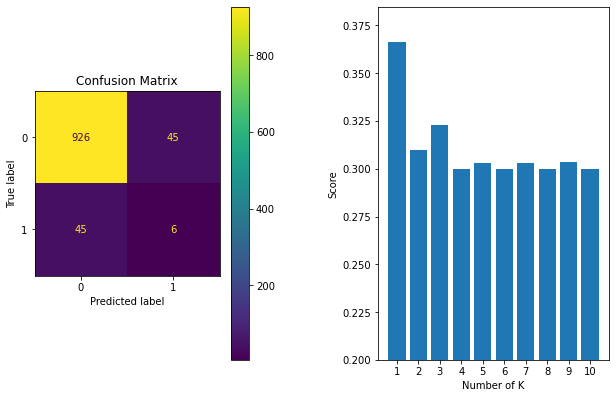

In [23]:
# >>>> Let's see what scores the kNN classifiers of various hyperparameters give based on this 80-20 splitting alone

# Generate object of class BestKNN and find the best K parameter
k = BestKNN( X_train, y_train, X_test, y_test )
k.FindBestK()

# Plot the results to visualise the impact of the varying hyperparameters
fig, ax = plt.subplots( ncols = 2 )
k.confusionMatrix( ax[ 0 ], k.best_KNN, k.X_test, k.y_test ) 
k.barchart( ax[ 1 ], "Number of K", [ i for i in range( 1, 11 ) ], k.scores )

fig.tight_layout()
fig.set_size_inches( 9, 6 )

print( f"The best classifier score on the testing set is \033[1m{ k.best_KNN_score }  \033[0m" )

The best classfier score on the testing set is 0.3  


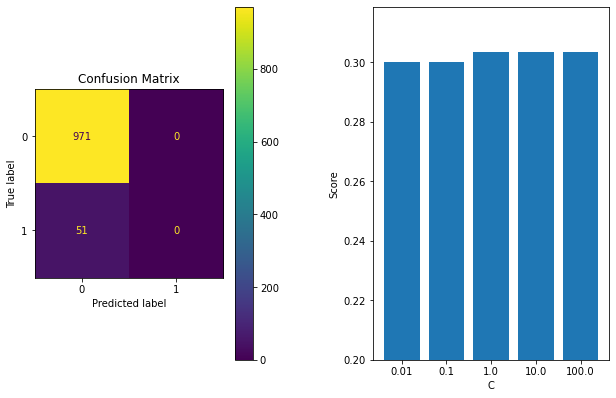

In [24]:
# >>>> Let's see what scores the LR classifiers of various hyperparameters give based on this 80-20 splitting alone

# Generate object of class BestLR and find the best C parameter
LR = BestLR( X_train, y_train, X_test, y_test )
LR.FindBestLR()

# Plot the results to visualise the impact of the varying hyperparameters
fig, ax = plt.subplots( ncols = 2 )
LR.confusionMatrix(ax[ 0 ], LR.best_LR, LR.X_test, LR.y_test ) 
LR.barchart( ax[ 1 ], "C",[ 0.01 * ( 10 ** i ) for i in range( 0, 5 ) ], LR.scores )

fig.tight_layout()
fig.set_size_inches( 9, 6 )

print( f"The best classfier score on the testing set is \033[1m{ LR.best_LR_score }  \033[0m" )

The best classifier score on the testing set is 0.3  


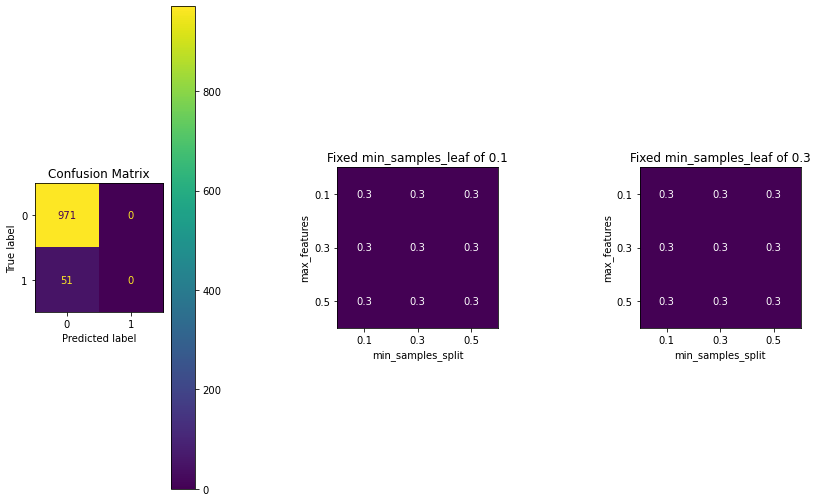

In [25]:
# >>>> Let's see what scores the RF classifiers of various hyperparameters give based on this 80-20 splitting alone

# Generate object of class BestLR and find the best min_samples_leaf, min_samples_split and max_features parameters
RF = BestRandomForest(X_train,y_train,X_test,y_test)
RF.FindBestRandomForest()

# >>>> Plot the results to visualise the impact of the varying hyperparameters
fig, ax = plt.subplots( ncols = 3 )

# CM of best RF classifier
RF.confusionMatrix( ax[ 0 ], RF.best_RF, RF.X_test, RF.y_test ) 
scores = RF.scores[ :9 ]

# Heatmap showing change in score with change in min_samples_split and max_features: fixed min_samples_leaf of 0.1
RF.plotHeatmap( ax[ 1 ], [ 0.1, 0.3, 0.5 ], [ 0.1, 0.3, 0.5 ], scores, "min_samples_split", "max_features" )
ax[ 1 ].set_title( "Fixed min_samples_leaf of 0.1" )

# Heatmap showing change in score with change in min_samples_split and max_features: fixed min_samples_leaf of 0.3
scores = RF.scores[ 9: ]
RF.plotHeatmap(ax[ 2 ],[ 0.1,0.3,0.5 ], [ 0.1,0.3,0.5 ], scores, "min_samples_split", "max_features" )
ax[ 2 ].set_title( "Fixed min_samples_leaf of 0.3" )

fig.tight_layout()
fig.set_size_inches( 12, 8 )

print( f"The best classifier score on the testing set is \033[1m{ RF.best_RF_score }  \033[0m" )

The best classfier score on the testing set is 0.36461097312251367  


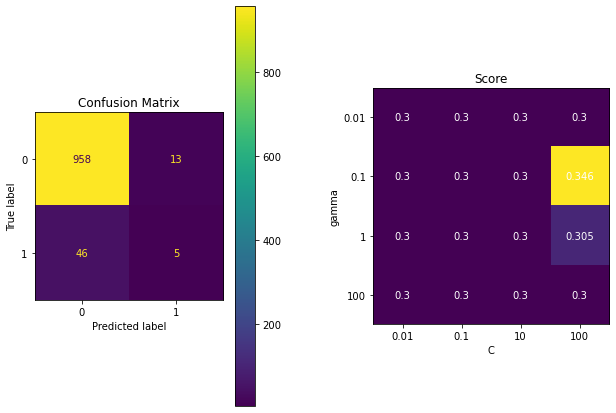

In [26]:
# >>>> Let's see what scores the RBF classifiers of various hyperparameters give based on this 80-20 splitting alone

# Generate object of class BestSVM and find the best RBF classifier by testing multiple parameters
SV = BestSVM( X_train, y_train, X_test, y_test )
SV.findBestRBF()

# Plot the results to visualise the impact of the varying hyperparameters
fig, ax = plt.subplots( ncols = 2 )
SV.confusionMatrix( ax[ 0 ], SV.best_RBF, SV.X_test, SV.y_test )
SV.plotHeatmap( ax[ 1 ], [ 0.01, 0.1, 10, 100 ], [ 0.01, 0.1, 1, 100 ], SV.scoresRBF, "C", "gamma" )

fig.tight_layout()
fig.set_size_inches( 9, 6 )

print( f"The best classfier score on the testing set is \033[1m{ SV.best_RBF_score }  \033[0m" )

C:\Users\Nikita DMITRIEFF\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Nikita DMITRIEFF\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The best classfier score on the testing set is 0.3  


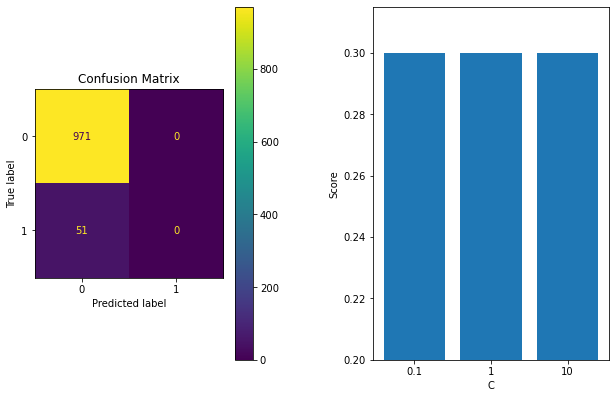

In [27]:
# >>>> Let's see what scores the LinearSVC classifiers of various hyperparameters give based on this 80-20 splitting alone

# Generate object of class BestSVM and find the best LinearSVC classifier by testing multiple parameters
SV = BestSVM(X_train,y_train,X_test,y_test)
SV.findBestLinearSVC()

# Plot the results to visualise the impact of the varying hyperparameters
fig, ax = plt.subplots(ncols=2)
SV.confusionMatrix(ax[0],SV.best_LSVC,SV.X_test,SV.y_test)
SV.barchart(ax[1],"C",[0.1,1,10 ] , SV.scoresLinearSVC)

fig.tight_layout()
fig.set_size_inches( 9, 6 )

print(f"The best classfier score on the testing set is \033[1m{SV.best_LSVC_score}  \033[0m")

The best classfier score on the testing set is 0.3  


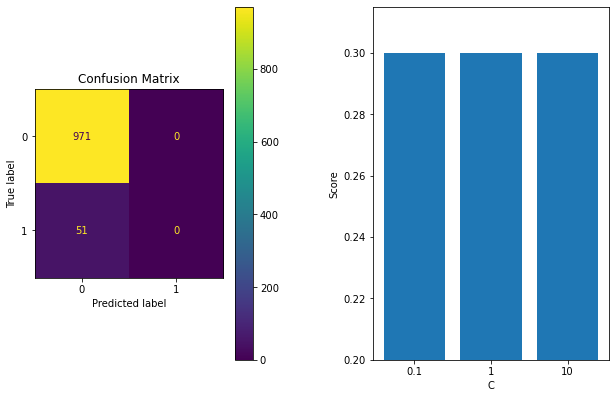

In [28]:
# >>>> Let's see what scores the SVCkl classifiers of various hyperparameters give based on this 80-20 splitting alone

# Generate object of class BestSVM and find the best SVCkl classifier by testing multiple parameters
SV = BestSVM( X_train, y_train, X_test, y_test )
SV.findBestSVCkl()

# Plot the results to visualise the impact of the varying hyperparameters
fig, ax = plt.subplots( ncols=2)
SV.confusionMatrix( ax[ 0 ], SV.best_SVCkl, SV.X_test, SV.y_test )
SV.barchart( ax[ 1 ], "C", [ 0.1, 1,10 ] , SV.scoresSVCkl )

fig.tight_layout()
fig.set_size_inches( 9, 6 )

print( f"The best classfier score on the testing set is \033[1m{ SV.best_SVCkl_score }  \033[0m" )

The best classfier score on the testing set is 0.313416530360857  


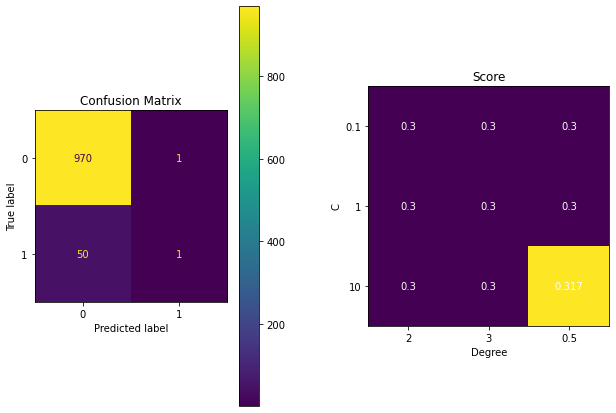

In [29]:
# >>>> Let's see what scores the Poly classifiers of various hyperparameters give based on this 80-20 splitting alone

# Generate object of class BestSVM and find the best Poly classifier by testing multiple parameters
SV = BestSVM( X_train, y_train, X_test, y_test )
SV.findBestPoly()

# Plot the results to visualise the impact of the varying hyperparameters
fig, ax = plt.subplots( ncols = 2 )
SV.confusionMatrix( ax[ 0 ], SV.Best_Poly, SV.X_test, SV.y_test )
SV.plotHeatmap( ax[ 1 ], [ 2, 3, 0.5 ], [ 0.1, 1, 10 ], SV.scoresPoly, "Degree", "C" )

fig.tight_layout()
fig.set_size_inches( 9, 6 )

print( f"The best classfier score on the testing set is \033[1m{ SV.best_Poly_score }  \033[0m" )


In [30]:
# Let's take a closer look at the proportions of the stroke and non stroke values in our data set

dataset["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<strong>Conclusion of this 80-20 splitting approach</strong>

As seen above we get very bad results for the score. This is likely due to the very low number of stroke cases compared to non-stroke cases in the original dataset. Classifiers are designed to work best on balanced datasets, however we have a very unbalanced dataset given non-stroke is the minority class. In order to deal with this issue, 2 approaches can be used:

<br><strong>-> A cost sensitive learning approach</strong>
<br> This approach involves using the paramater class_weight which assigns an error cost that is inversely proportional to the class size. In our case the model will penalise more binary 0s (non-stroke) compared to binary 1s (stroke). 

<br><strong>-> Performing undersampling </strong>
<br>This approach involves reducing the number of binary 0s in the dataset, in order to achieve a better balance of 0s and 1s. 
<br>
<br>Due to the high computational cost, the effect of tuning the class_weight for the cost sensitive approach will be tested on only 2 classifiers. This is because it is deemed more efficient to begin with the undersampling approach (as we assume it is better) and subsequently use the cost sensitive approach. We then combine the 2 approaches to achieve an even better train-test split.</br>
<br>
<br><h4>3.2 The Cost Sensitive Approach</h4>


In [31]:
weights = [ "balanced",{ 0 : 1, 1 : 10 }, { 0 : 0.03 , 1 : 5 },{ 0 : 1, 1 : 50 }, { 0 : 1, 1 : 100 }] #Selected class_weights
lr_scores = []
rf_scores = []

for i in weights:
    lr = LogisticRegression( class_weight = i ).fit( X_train, y_train )
    lr_scores.append( f1_score( y_test, lr.predict( X_test ) ) )
    rf = svm.SVC( kernel = "rbf", class_weight = i).fit( X_train, y_train )
    rf_scores.append( f1_score( y_test, rf.predict( X_test ) ) )

pd.DataFrame( { "F-1 score Logistic Regression" : lr_scores, "F-1 score Random Forest": rf_scores } )   

,F-1 score Logistic Regression,F-1 score Random Forest
0,0.234286,0.235294
1,0.255144,0.226415
2,0.141274,0.133333
3,0.192913,0.207407
4,0.161290,0.196262


The cost sensitive approach was performed on two algorithms: Logistic Regression and Random Forest. As can be seen in the dataframe above, the F1-score are indeed improved by using this approach. The class_weight parameter allows fine manipulation of the score. In our case, the class_weight allows for precise control of the accuracy score of the Stroke class. However, this is at the expense of the accuracy of the Non-Stroke class. Hence, undersampling is performed <strong>prior</strong> to the cost sensitive approach in order to increase the accuracy of both the Stroke and Non-Stroke classes. Subsequently, the cost-sensitive approach is performed in order to fine tune the accuracy of the Stroke class. 

<h4>3.3 The Undersampling Approach</h4>

In [32]:
# Creating datasets with different amounts of undersampling 

data_stroke = processed_data[processed_data["stroke"] == 1].copy()
index_test = np.random.choice(list(data_stroke.index.values), size = 50, replace = False)
one_test = data_stroke.loc[index_test]
one_y_test = one_test["stroke"]
one_X_test = one_test.drop(["stroke"],axis = 1)
data_stroke =data_stroke.drop(list(one_test.index.values))

data_non_stroke = processed_data[processed_data["stroke"] == 0].copy()
index_test = np.random.choice(list(data_non_stroke.index.values), size = 950, replace = False)
zero_test = data_non_stroke.loc[index_test]
zero_y_test = zero_test["stroke"]
zero_X_test = zero_test.drop(["stroke"],axis = 1)
data_non_stroke =data_non_stroke.drop(list(zero_test.index.values))

X_test = pd.concat([zero_X_test,one_X_test]).to_numpy()
y_test = pd.concat([zero_y_test,one_y_test]).to_numpy()
r = [4,3,2,1] # r corresponds to the selected splitting ratios of the training set 
dict_X_train = {}
dict_y_train = {}

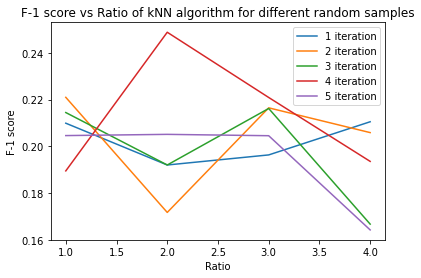

In [33]:
# Selection of the best splitting ratio of the training set

for j in range(5):
    scoreKNN = []
    
    for i in r:
        zero_train = data_non_stroke.sample(n= i* data_stroke.shape[0])
        zero_X_train = zero_train.drop(["stroke"],axis =1 )
        X_train = pd.concat([zero_X_train,data_stroke.drop(["stroke"], axis = 1)]).to_numpy()
        dict_X_train[i] = X_train
        zero_y_train =  zero_train["stroke"]
        y_train = pd.concat([zero_y_train,data_stroke["stroke"]]).to_numpy()
        dict_y_train[i] = y_train
        X_train = dict_X_train[i]
        y_train = dict_y_train[i]
        KNN = KNeighborsClassifier().fit(X_train,y_train)
        scoreKNN.append(f1_score(y_test,KNN.predict(X_test)))
    
    plt.plot(r,scoreKNN, label = f"{j+ 1} iteration")

plt.legend()
plt.xlabel("Ratio")
plt.ylabel("F-1 score")
plt.title("F-1 score vs Ratio of kNN algorithm for different random samples")
plt.show()

Due to the very small amount of data generated by the small amount of 0s, this causes significant fluctuations in the F1 score. We therefore take the 50-50 splitting ratio of the training dataset to be the best, as this splitting has the smallest fluctuation as can be seen in the above graph.<br>
It is important to note the exact same test dataset is used on all classifiers, in order to ensure a fair test. This test set has a 95-5 Non-Stroke-Stroke splitting ratio (just like in the original dataset).

In [34]:
X_train = dict_X_train[1]
y_train = dict_y_train[1]
scoresList = {}

The best classifier score on the testing set is 0.748736842105263  


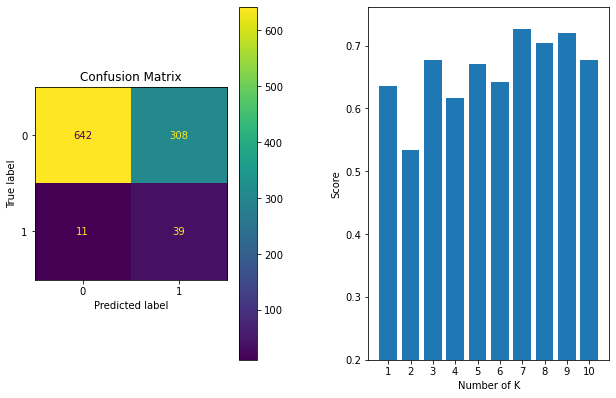

In [35]:
# >>>> Let's see what scores the KNN classifiers of various hyperparameters give based on this undersampling technique

# Generate object of class BestKNN and find the best K parameter
k = BestKNN( X_train, y_train, X_test, y_test )
k.FindBestK()

# Plot the results to visualise the impact of the varying hyperparameters
fig, ax = plt.subplots( ncols = 2 )
k.confusionMatrix( ax[ 0 ], k.best_KNN, k.X_test, k.y_test ) 
k.barchart( ax[ 1 ], "Number of K", [ i for i in range( 1, 11 ) ], k.scores )

fig.tight_layout()
fig.set_size_inches( 9, 6 )

print( f"The best classifier score on the testing set is \033[1m{ k.best_KNN_score }  \033[0m" )

scoresList["KNN"] = k.best_KNN_score

The best classfier score on the testing set is 0.8351578947368421  


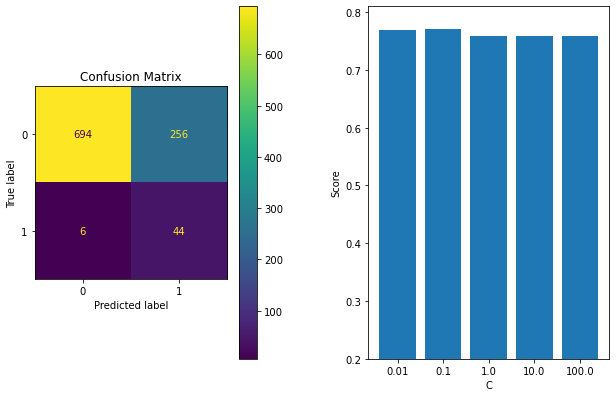

In [36]:
# >>>> Let's see what scores the LR classifiers of various hyperparameters give based on this undersampling technique

# Generate object of class BestLR and find the best C parameter
LR = BestLR( X_train, y_train, X_test, y_test )
LR.FindBestLR()

# Plot the results to visualise the impact of the varying hyperparameters
fig, ax = plt.subplots( ncols = 2 )
LR.confusionMatrix(ax[ 0 ], LR.best_LR, LR.X_test, LR.y_test ) 
LR.barchart( ax[ 1 ], "C",[ 0.01 * ( 10 ** i ) for i in range( 0, 5 ) ], LR.scores )

fig.tight_layout()
fig.set_size_inches( 9, 6 )

print( f"The best classfier score on the testing set is \033[1m{ LR.best_LR_score }  \033[0m" )

scoresList["LR"] = LR.best_LR_score

The best classifier score on the testing set is 0.8468421052631578  


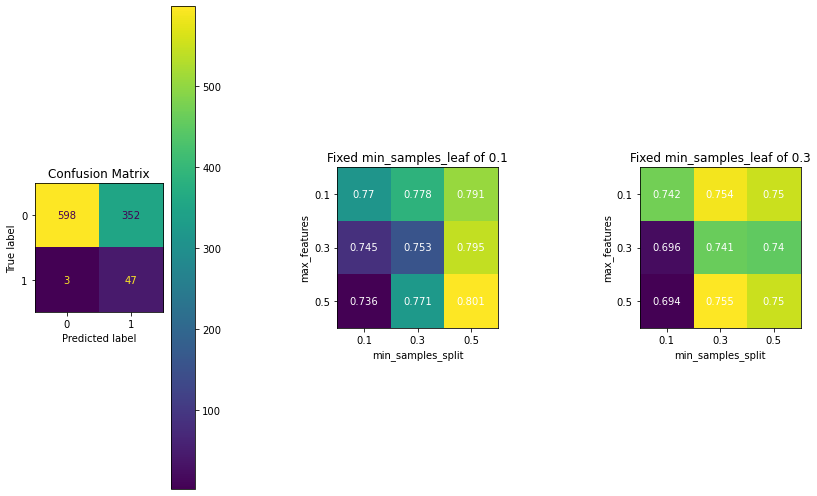

In [37]:
 # >>>> Let's see what scores the RF classifiers of various hyperparameters give based on this undersampling technique

# Generate object of class BestLR and find the best min_samples_leaf, min_samples_split and max_features parameters
RF = BestRandomForest(X_train,y_train,X_test,y_test)
RF.FindBestRandomForest()

# >>>> Plot the results to visualise the impact of the varying hyperparameters
fig, ax = plt.subplots( ncols = 3 )

# CM of best RF classifier
RF.confusionMatrix( ax[ 0 ], RF.best_RF, RF.X_test, RF.y_test ) 
scores = RF.scores[ :9 ]

# Heatmap showing change in score with change in min_samples_split and max_features: fixed min_samples_leaf of 0.1
RF.plotHeatmap( ax[ 1 ], [ 0.1, 0.3, 0.5 ], [ 0.1, 0.3, 0.5 ], scores, "min_samples_split", "max_features" )
ax[ 1 ].set_title( "Fixed min_samples_leaf of 0.1" )

# Heatmap showing change in score with change in min_samples_split and max_features: fixed min_samples_leaf of 0.3
scores = RF.scores[ 9: ]
RF.plotHeatmap(ax[ 2 ],[ 0.1,0.3,0.5 ], [ 0.1,0.3,0.5 ], scores, "min_samples_split", "max_features" )
ax[ 2 ].set_title( "Fixed min_samples_leaf of 0.3" )

fig.tight_layout()
fig.set_size_inches( 12, 8 )

print( f"The best classifier score on the testing set is \033[1m{ RF.best_RF_score }  \033[0m" )

scoresList["RF"] = RF.best_RF_score

The best classfier score on the testing set is 0.8619999999999999  


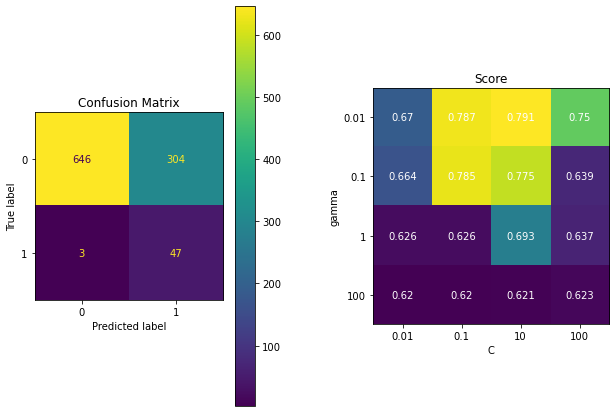

In [38]:
# >>>> Let's see what scores the RBF classifiers of various hyperparameters give based on this undersampling technique

# Generate object of class BestSVM and find the best RBF classifier by testing multiple parameters
SV = BestSVM( X_train, y_train, X_test, y_test )
SV.findBestRBF()

# Plot the results to visualise the impact of the varying hyperparameters
fig, ax = plt.subplots( ncols = 2 )
SV.confusionMatrix( ax[ 0 ], SV.best_RBF, SV.X_test, SV.y_test )
SV.plotHeatmap( ax[ 1 ], [ 0.01, 0.1, 10, 100 ], [ 0.01, 0.1, 1, 100 ], SV.scoresRBF, "C", "gamma" )

fig.tight_layout()
fig.set_size_inches( 9, 6 )

print( f"The best classfier score on the testing set is \033[1m{ SV.best_RBF_score }  \033[0m" )

scoresList["RBF"] = SV.best_RBF_score

The best classfier score on the testing set is 0.8351578947368421  


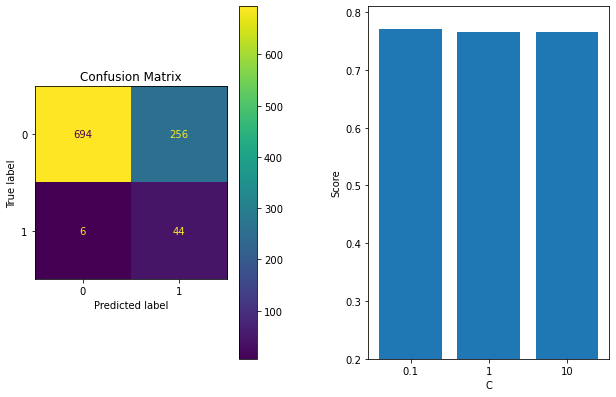

In [39]:
# >>>> Let's see what scores the LinearSVC classifiers of various hyperparameters give based on this undersampling technique

# Generate object of class BestSVM and find the best LinearSVC classifier by testing multiple parameters
SV = BestSVM( X_train, y_train, X_test, y_test )
SV.findBestLinearSVC()

# Plot the results to visualise the impact of the varying hyperparameters
fig, ax = plt.subplots( ncols = 2) 
SV.confusionMatrix( ax[ 0 ], SV.best_LSVC, SV.X_test, SV.y_test )
SV.barchart(ax[ 1 ],"C",[ 0.1, 1, 10 ] , SV.scoresLinearSVC )

fig.tight_layout()
fig.set_size_inches( 9, 6 )

print(f"The best classfier score on the testing set is \033[1m{SV.best_LSVC_score}  \033[0m")

scoresList["LSVC"] = SV.best_LSVC_score

C:\Users\Nikita DMITRIEFF\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Nikita DMITRIEFF\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Nikita DMITRIEFF\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


The best classfier score on the testing set is 0.8323157894736842  


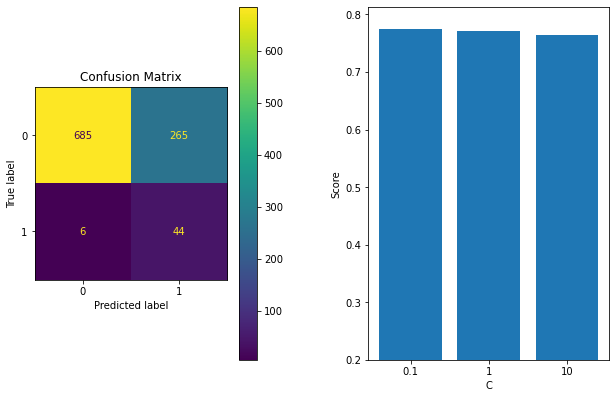

In [40]:
# >>>> Let's see what scores the SVCkl classifiers of various hyperparameters give based on this undersampling technique

# Generate object of class BestSVM and find the best SVCkl classifier by testing multiple parameters
SV = BestSVM( X_train, y_train, X_test, y_test )
SV.findBestSVCkl()

# Plot the results to visualise the impact of the varying hyperparameters
fig, ax = plt.subplots( ncols=2)
SV.confusionMatrix( ax[ 0 ], SV.best_SVCkl, SV.X_test, SV.y_test )
SV.barchart( ax[ 1 ], "C", [ 0.1, 1,10 ] , SV.scoresSVCkl )

fig.tight_layout()
fig.set_size_inches( 9, 6 )

print( f"The best classfier score on the testing set is \033[1m{ SV.best_SVCkl_score }  \033[0m" )

scoresList["SVCkl"] = SV.best_SVCkl_score

The best classfier score on the testing set is 0.825578947368421  


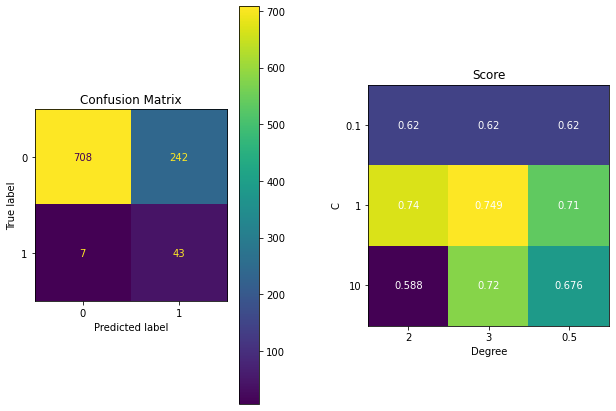

In [41]:
# >>>> Let's see what scores the Poly classifiers of various hyperparameters give based on this undersampling technique

# Generate object of class BestSVM and find the best Poly classifier by testing multiple parameters
SV = BestSVM( X_train, y_train, X_test, y_test )
SV.findBestPoly()

# Plot the results to visualise the impact of the varying hyperparameters
fig, ax = plt.subplots( ncols = 2 )
SV.confusionMatrix( ax[ 0 ], SV.Best_Poly, SV.X_test, SV.y_test )
SV.plotHeatmap( ax[ 1 ], [ 2, 3, 0.5 ], [ 0.1, 1, 10 ], SV.scoresPoly, "Degree", "C" )

fig.tight_layout()
fig.set_size_inches( 9, 6 )

print( f"The best classfier score on the testing set is \033[1m{ SV.best_Poly_score }  \033[0m" )

scoresList["Poly"] = SV.best_Poly_score

In [42]:
# Get the best Classifier from these tests

list(scoresList.keys())[list(scoresList.values()).index(max(scoresList.values()))]

'RBF'

The best classifier for this random iteration of the code is printed above. We noted the result changes each time due to the large variance in the dataset. This large variance is due to the few datapoints available after having imposed a 50-50 splitting ratio of Non-Stroke-Stroke on the training dataset.<br>
The best hyperparameters for each classifier were found above, we now must select the best one. To do so, we will use the Classification Accuracy score which is coded above. The entire kernel was run 15 times in order to generate 15 different train-test splits that will each find their own optimized hyperparameters for each classifier. For each run, 2000 iterations and therefore 2000 train-test splits were performed in order to calculate a mean and standard deviation of score for each classifier. The highest scoring classifier with the smallest standard deviation was then chosen as the best classifier for this dataset.<br>
An Excel file demonstrating this procedure is attached to this submission.

In [43]:
# Dictionnary of the best hyperparameters for each type of classifier

models_dict = {
    'KNN' : BestKNN( X_train, y_train, X_test, y_test ).FindBestK(),
    'LR' : BestLR( X_train, y_train, X_test, y_test ).FindBestLR(),
    'RF' : BestRandomForest( X_train, y_train, X_test, y_test ).FindBestRandomForest(),
    'LSVC' : BestSVM( X_train, y_train, X_test, y_test ).findBestSVCkl(),
    'SVCkl' : BestSVM( X_train, y_train, X_test, y_test ).findBestLinearSVC(),
    'Poly' : BestSVM( X_train, y_train, X_test, y_test ).findBestPoly(),
    'RBF' : BestSVM( X_train, y_train, X_test, y_test ).findBestRBF()
}


C:\Users\Nikita DMITRIEFF\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Nikita DMITRIEFF\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Nikita DMITRIEFF\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [44]:
# Getting the Best classifier from the classifiers with the optimised hyperparameters
# This is done by creating a CSV file

print( models_dict )

Name = "Nikita"  

Run_Number = 3

df_results = pd.DataFrame()

for column in models_dict.keys():
    df_results[ column ] = []
    
def scoring ( y: np.ndarray, y_pred: np.ndarray, weight = [ 0.3, 0.7 ] ):
    """This function scores the Classification Accuracy of each classifier"""
    T = list( y )
    P = list( y_pred )
    TP = 0 #TP = True Positive
    FP = 0 #FP = False Positive
    TN = 0 #TN = True Negative
    FN = 0 #FN = False Negative
    for i in range( len( T ) ):
        if T[ i ] == P[ i ] and T[ i ] == 0:
            TP+=1
        elif T[ i ] != P[ i ] and T[ i ] == 0: 
            FP +=1
        elif T[ i ] == P[ i ] and T[ i ] == 1:
            TN+=1
        else:
            FN+=1
    ScoreP = TP / ( TP + FP) # Positive Classification Accuracy
    ScoreN = TN / ( TN + FN) # Negative Classification Accuracy
    Score = weight[ 0 ] * ScoreP + weight[ 1 ] * ScoreN
    return Score

nb_of_iterations = 50

for i in range( nb_of_iterations ):
    
    result_of_iteration = []
    
    # >>>> Splitting of the data
    
    # Creating the Test data set of constant proportions (equal to the proportions of the initial overall data set collected)
    data_stroke_only = processed_data[ processed_data[ "stroke" ] == 1 ].copy()
    index_test = np.random.choice( list( data_stroke_only.index.values ), size = 50, replace = False )
    data_test_one_only = data_stroke_only.loc[ index_test ]
    one_y_test = data_test_one_only[ "stroke" ]
    one_X_test = data_test_one_only.drop( [ "stroke" ], axis = 1 )
    data_stroke_only = data_stroke_only.drop( list( data_test_one_only.index.values ) )
    X_test = pd.concat( [ zero_X_test, one_X_test ] ).to_numpy()
    y_test = pd.concat( [ zero_y_test, one_y_test ] ).to_numpy()
    
    # Creating the Train data set 
    dict_X_train = {}
    dict_y_train = {}
    zero_train = data_non_stroke.sample( n = 1 * data_stroke_only.shape[ 0 ] )
    zero_X_train = zero_train.drop( [ "stroke" ], axis = 1 )
    X_train = pd.concat( [ zero_X_train,data_stroke_only.drop( [ "stroke" ], axis = 1)]).to_numpy()
    dict_X_train[ 1 ] = X_train
    zero_y_train =  zero_train[ "stroke" ]
    y_train = pd.concat( [ zero_y_train,data_stroke_only[ "stroke" ] ] ).to_numpy()
    dict_y_train[ 1 ] = y_train
    X_train = dict_X_train[ 1 ]
    y_train = dict_y_train[ 1 ]
    
    # >>>> Running the tests on the classifiers with the best hyperparameters
    
    # KNN
    KNN = KNeighborsClassifier( models_dict[ 'KNN' ] ).fit( X_train, y_train )
    k_pred = KNN.predict( X_test )
    result_of_iteration.append( scoring( y_test, k_pred ) )

    # Logistic Regression
    lr = LogisticRegression( C = models_dict[ 'LR' ], max_iter  = 10000 ).fit( X_train, y_train )
    lr_pred = lr.predict( X_test )
    result_of_iteration.append( scoring( y_test, lr_pred ) )
    
    # Random Forest
    rf = RandomForestClassifier( min_samples_leaf = models_dict[ 'RF' ][ 0 ], min_samples_split = models_dict[ 'RF' ][ 1 ], max_features = models_dict[ 'RF' ][ 2 ] ).fit( X_train, y_train )
    rf_pred = rf.predict(X_test)
    result_of_iteration.append( scoring( y_test, rf_pred ) )
    
    # Linear SVC
    lsvc = svm.LinearSVC( C =  models_dict[ 'LSVC' ], max_iter  = 10000 ).fit( X_train, y_train )
    lsvc_pred = lsvc.predict( X_test )
    result_of_iteration.append( scoring( y_test, lsvc_pred ) )
    
    # Linear Kernel SVC
    svckl = svm.SVC(kernel = "linear", C =  models_dict[ 'SVCkl' ], max_iter = 10000 ).fit( X_train, y_train )
    svckl_pred = svckl.predict(X_test)
    result_of_iteration.append( scoring( y_test, svckl_pred ) )
       
    # Poly
    poly = svm.SVC(kernel = "poly", gamma =  models_dict[ 'Poly' ][ 0 ], C =  models_dict[ 'Poly' ][ 1 ], degree =  models_dict[ 'Poly' ][ 2 ]).fit( X_train, y_train )
    poly_pred = poly.predict( X_test )
    result_of_iteration.append( scoring( y_test, poly_pred ) )
        
    # RBF
    rbf = svm.SVC( kernel = "rbf", gamma = models_dict[ 'RBF' ][ 0 ], C =  models_dict[ 'RBF' ][ 1 ]).fit( X_train, y_train )
    rbf_pred = rbf.predict( X_test )
    result_of_iteration.append( scoring( y_test, rbf_pred ) )
    
    # >>>> Add result_of_iteration to the result dataframe
    
    a_series = pd.Series( result_of_iteration, index = df_results.columns )
    df_results = df_results.append(a_series, ignore_index = True )

# Add mean and standard deviation
df_results = df_results.append( df_results.mean(), ignore_index = True )
df_results = df_results.append( df_results.std(), ignore_index = True )
df_results = df_results.rename( index = { len( df_results ) - 2 : 'Mean', len( df_results ) - 1 : 'STD' } )

df_results.to_csv( f"data_of_{ Name }_for_{ nb_of_iterations }_iterations_run_{ Run_Number }", sep = " " )

{'KNN': 7, 'LR': 0.1, 'RF': (0.1, 0.5, 0.5), 'LSVC': 0.1, 'SVCkl': 0.1, 'Poly': (0.1, 1, 2), 'RBF': (0.01, 1)}


<strong>RBF is the best classifier!</strong>
<br>However, as can be seen from the attached Excel file the classifiers are very close in score. More Stroke data would have been necessary in order to get a larger difference in scores between classifiers. 

<h4>3.4. Tuning of the Best Classifier Using the Cost-Sensitive Appproach</h4>

In [45]:
# Creating a new 50-50 training set and a 95-5 testing set that will be used to tune the best classifier
data_stroke = processed_data[processed_data["stroke"] == 1].copy()
index_test = np.random.choice(list(data_stroke.index.values), size = 50, replace = False)
one_test = data_stroke.loc[index_test]
one_y_test = one_test["stroke"]
one_X_test = one_test.drop(["stroke"],axis = 1)
data_stroke = data_stroke.drop(list(one_test.index.values))

data_non_stroke = processed_data[processed_data["stroke"] == 0].copy()
index_test = np.random.choice(list(data_non_stroke.index.values), size = 950, replace = False)
zero_test = data_non_stroke.loc[index_test]
zero_y_test = zero_test["stroke"]
zero_X_test = zero_test.drop(["stroke"],axis = 1)
data_non_stroke = data_non_stroke.drop(list(zero_test.index.values))

df_X_test = pd.concat([zero_X_test,one_X_test])
y_test = pd.concat([zero_y_test,one_y_test]).to_numpy()

zero_train = data_non_stroke.sample(n= 1*data_stroke.shape[0])
zero_X_train = zero_train.drop(["stroke"],axis =1 )
df_X_train = pd.concat([zero_X_train,data_stroke.drop(["stroke"], axis = 1)])
zero_y_train =  zero_train["stroke"]
y_train = pd.concat([zero_y_train,data_stroke["stroke"]]).to_numpy()

The stroke accuracy is 0.88 and the non-stroke accuracy is 0.7136842105263158
{0: 1, 1: 0.804}


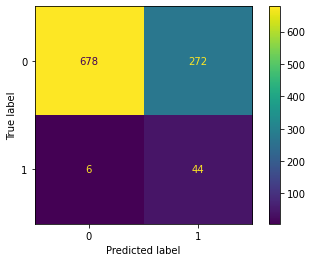

In [50]:
weight = { 0 : 1, 1 : 0.7 }

X_train = df_X_train.to_numpy()

Score_dict = {}
 
count = 0
while count <= 500 : 
    
    count += 1
    
    RBF = svm.SVC(kernel = "rbf", gamma = models_dict[ 'RBF' ][ 0 ], C =  models_dict[ 'RBF' ][ 1 ], class_weight = weight).fit(X_train,y_train)
    weight[1] = weight[1] + 0.002
    c = confusion_matrix(y_test, RBF.predict(X_test))[ 1 ][ 1 ]
    a = confusion_matrix(y_test, RBF.predict(X_test))[ 0 ][ 0 ]
    
    if c / 50 >= 0.8 and a / 950 >= 0.7:
        Score_dict[ weight[ 1 ] ] = [ c / 50, a / 950, 0.55 * ( c / 50 ) + 0.45 * ( a / 950 ) ]

best_weight = 0
for weight in Score_dict.keys():
    if Score_dict[ weight ][ 2 ] > best_weight:
        best_weight = Score_dict[ weight ][ 2 ]
        best_score_stroke = Score_dict[ weight ][ 0 ]
        best_score_non_stroke = Score_dict[ weight ][ 1 ]
        weight_dict = { 0: 1, 1: weight }
        
fig, ax = plt.subplots()
RBF = svm.SVC(kernel = "rbf", gamma = models_dict[ 'RBF' ][ 0 ], C =  models_dict[ 'RBF' ][ 1 ], class_weight = weight_dict ).fit(X_train,y_train)
plot_confusion_matrix(RBF, X_test, y_test, ax = ax)
print(f"The stroke accuracy is \033[1m{ best_score_stroke }\033[0m and the non-stroke accuracy is \033[1m{ best_score_non_stroke }\033[0m")

print( weight_dict )


As illustrated above, in tuning the weighting of the classes, we managed to attain and even exceed our target of around <strong>80%</strong> success rate in predicting stroke patients whilst simultaneously maintaining a high success rate of around <strong>70%</strong> in predicting non-stroke patients. 


<a id = "Stage 4"></a>
<br><h2> 4.Graphical User Interface</h2>

**How to use the Graphical User Interface** <br>We have created a window for the user to select specific variables and see the effects of these variables on the predicivity of the model, through a plot of the confusion matrix, and determination of the score. 
<br> We have also included a bar chart which plots the score for each individual variable (by removing all the others from the dataset, and subsequently using the RBF classifier to predict the likelihood of a stroke for each variable). This should aid the user in making direct comparisons between the scores of different variables, and so should support the results in the confusion matrix for better understanding of the effects of each variable on the predictivity of the model.  
<br><strong> <h3> Note: The window can be found at the bottom of your screen. Please make sure you close the Tkinter window after to prevent infinite running of the code.</h3> </strong>

<br>
<strong> Why we chose Tkinter:</strong> <br>We chose to use tkinter to create this checklist as we felt it was simpler for the user to have a separate window for the checkbuttons, which could be minimised to allow only the confusion matrix and bar chart to be displayed and so the results could be seen more clearly. 
<br> Additonally, as variables are selected by the user and each confusion matrix is plotted, tkinter checkbuttons allow a new confusion matrix to be plotted each time <strong>below the previous graph</strong>. This allows the user to make comparisons between confusion matrices for different selections of variables by simply scrolling up and down, another reason why tkinter was used. 

The selected variables are:
• Age
• Hypertension
• Heart disease
• Average glucose level
• BMI
• Smoking status
• Gender
• Marital status
• Work type
• Residence type

 The score is 0.8559999999999999


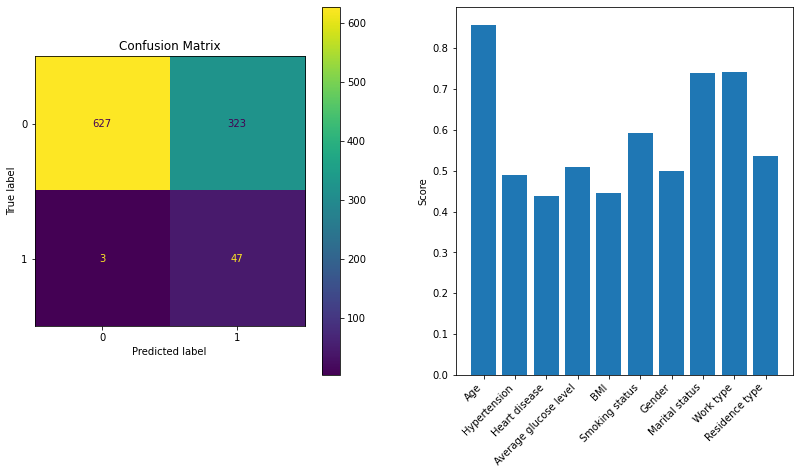

In [49]:
#Create a Tkinter window for the selection of variables
window = tk.Tk()

#List of all the variables' names
column_names = df_X_train.columns.to_list()

dic_columns = {'Age': [column_names[0]], 'Hypertension': [column_names[1]], 'Heart disease': [column_names[2]],
               'Average glucose level': [column_names[3]], 'BMI': [column_names[4]], 'Smoking status': [column_names[5]],
               'Gender': column_names[6:9], 'Marital status': column_names[9:11], 'Work type': column_names[11:16],
               'Residence type': column_names[16:19]}

#Create a list of integers using the tkinter IntVar method. When a checkbutton is clicked var=1; when it's unclicked var=0.
var = []

for i in range(len(list(dic_columns.keys()))):
    var.append(tk.IntVar())
    

def graph():
    """ Plots a confusion matrix of the selected parameters and a bar chart of the individual contribution of each parameter
    when the user clicks on the button 'Plot the results' """
    
    clicked_variables = []
    score_indiv = []
    
    print("The selected variables are:")
    for i in range(len(list(dic_columns.keys()))):
        if var[i].get() == 1:
            clicked_variables.extend(dic_columns[list(dic_columns.keys())[i]])
            print(f"\u2022 {list(dic_columns.keys())[i]}")
    
    #create an empty matplotlib figure with 2 subplots
    fig, ax = plt.subplots(ncols = 2)
    fig.tight_layout()
    fig.set_size_inches( 12, 6 )
    
    #obtaining the training and testing set for the selected variables using the optimal train-test split found previously
    X_train = df_X_train[ clicked_variables ]
    X_train = X_train.to_numpy()
    X_test = df_X_test[ clicked_variables ] 
    X_test = X_test.to_numpy()
    
    #plot the confusion matrix and the score for the RBF classifier for the selected variables
    rbf = svm.SVC( kernel = "rbf", gamma = models_dict[ 'RBF' ][ 0 ], C =  models_dict[ 'RBF' ][ 1 ] ).fit(X_train, y_train)
    rbf_pred = rbf.predict(X_test)
    
    score = scoring(y_test, rbf_pred)
    print(f"\n The score is \033[1m{score}\033[0m")
    
    ax[0].set_title("Confusion Matrix")
    graph = plot_confusion_matrix(rbf, X_test, y_test, ax = ax[0]) 
    
    #Obtain the score for the RBF classifier for each individual variable and plot a barchart of the results
    for i in range(len(list(dic_columns.keys()))):
        indiv_X_train = df_X_train[dic_columns[list(dic_columns.keys())[i]]].to_numpy()
        indiv_X_test = df_X_test[dic_columns[list(dic_columns.keys())[i]]].to_numpy() 
        
        rbf = svm.SVC( kernel = "rbf", gamma = models_dict[ 'RBF' ][ 0 ], C =  models_dict[ 'RBF' ][ 1 ] ).fit(indiv_X_train, y_train)
        rbf_pred = rbf.predict(indiv_X_test)
        score_indiv.append(scoring(y_test, rbf_pred))  
        
    x=[0,1,2,3,4,5,6,7,8,9]
    graph2 = ax[1].bar(x,score_indiv, align='center')
    ax[1].set_xticks(x)
    ax[1].set_xticklabels(dic_columns.keys(), rotation=45, ha='right')
    ax[1].set_ylabel("Score")
    
    plt.show()
    

#Create check buttons for all the variables and arrange widgets in blocks
for i in range (len(list(dic_columns.keys()))):
    checkbutton= tk.Checkbutton(window, text=list(dic_columns.keys())[i], variable=var[i]).pack()
    
#Create a plot button that plots the confusion matrix and barchart when clicked (see graph() function)
plot_button = tk.Button(window, text="Plot the results", command = graph).pack()
    
        
window.mainloop() #event loop

<strong>Note:</strong> 
In the presentation of our results, we did not use the 'class weight' keyword argument inside the RBF classifier function shown in section "**3.4 Tuning the best parameters using the cost sensitive approach**" as it did not reflect the effect of each variable on the predictivity. Class weights is used to obtain the accuracy wanted as stated above in section 3.4. However, it doesn't allow us to see the effect of each variable as it disregards certain variables.
<a id = "Stage 5"></a>
<h2> 5.Conclusion </h2>

From the results, we can see that <strong>age</strong>, <strong>marital status</strong> and <strong>work type</strong>  are the <strong>most correlated variables</strong> to the probability of stroke.


For further work, we could train and test the RBF classifier using only the most correlated variables to improve the predictions of strokes. Other Machine Learning such as <strong>Naives Bayes</strong> and <strong>SMOTE</strong> could be used as these are designed to deal with highly unbalanced and outliered data. 